In [400]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [401]:
boston=load_boston()
# X = load_boston().data
# Y = load_boston().target
# print(type(boston))
# print(X.shape)
# print(X[0:5])
# print(Y[1:5])


In [402]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
# Loading data into pandas dataframe
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [403]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [404]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [405]:
# Standardization

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [406]:
X_train

array([[ 0.9118389 , -0.50241886,  1.07230484, ...,  0.80807825,
        -2.84295938,  1.52320257],
       [-0.41172732, -0.50241886, -1.12979483, ..., -0.30417427,
         0.42743634, -0.99523956],
       [ 0.12458293, -0.50241886,  1.07230484, ...,  0.80807825,
        -0.05335342, -0.76564608],
       ...,
       [-0.39713851, -0.50241886, -0.18839347, ...,  0.3446397 ,
         0.38630716,  0.71962537],
       [-0.3910951 , -0.50241886, -0.05347927, ...,  0.06657657,
         0.4043083 , -0.22000723],
       [-0.40576854,  3.07573229, -1.35465184, ...,  1.64226764,
         0.18977581, -0.98531886]])

In [407]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

sgd_error=mean_squared_error(Y_test,Y_pred)
print(sgd_error)

Coefficients: 
 [-0.9387156   0.60667148 -0.43740882  0.34466554 -0.45569348  3.19771771
 -0.27604934 -1.68464967  0.49883503 -0.52354914 -1.90580467  0.91296242
 -3.35850216]
Y_intercept [21.91945488]
30.32420123757052


## Implementing Manual SGD

In [408]:
# Convert it into pandas dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [409]:
#noramlization for fast convergence to minima
data = (data - data.mean())/data.std()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [410]:
# MEDV(median value is usually target), change it to price
data["PRICE"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [411]:
# Target and features
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [412]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [413]:
x_train["PRICE"] = y_train
#x_test["PRICE"] = y_test

In [414]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [415]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate,n_iter):
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(160)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        # Test sample
        #x_test["PRICE"] = [y_test]
        #test_data = x_test
        #test_sample = test_data.sample()
        #y_test = np.asmatrix(test_sample["PRICE"])
        #x_test = np.asmatrix(test_sample.drop("PRICE", axis = 1))
        
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[-1.58120358e+00]
 [-2.16439484e+00]
 [ 3.00157926e-01]
 [ 2.96328295e+00]
 [-1.37513745e+00]
 [ 5.66046218e+00]
 [ 6.01176895e-01]
 [-1.47890538e+00]
 [-2.61318049e-01]
 [ 5.44301895e-03]
 [ 3.67502296e-01]
 [ 2.50528305e+00]
 [-2.96396211e+00]] 
 y_intercept: [[21.30167771]]
Mean squared error: [[54.09827845]]


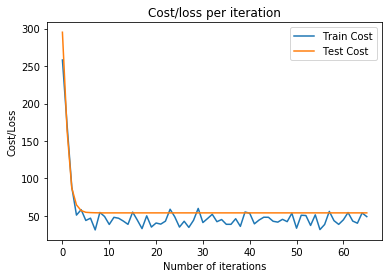

In [416]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate,500)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))


error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error:",error)


plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

Coefficient: [[-0.01923488]
 [ 1.00740553]
 [-0.21221932]
 [ 0.88656796]
 [ 0.43597113]
 [ 1.73046759]
 [-0.28962618]
 [ 1.09378656]
 [ 0.19239457]
 [-0.11079908]
 [-0.2345236 ]
 [ 0.74179052]
 [-0.41166417]] 
 y_intercept: [[2.84557011]]


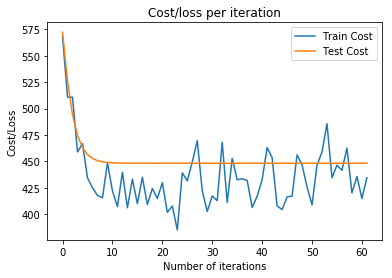

In [382]:
# Run our model
learning_rate = 0.0001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate,1000)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

'''
error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error:",error)
'''

plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

## Manual SGD Regressor implementation

In [383]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate,n_iter):
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(20)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        # Test sample
        #x_test["PRICE"] = [y_test]
        #test_data = x_test
        #test_sample = test_data.sample()
        #y_test = np.asmatrix(test_sample["PRICE"])
        #x_test = np.asmatrix(test_sample.drop("PRICE", axis = 1))
        
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[-4.34253948]
 [-1.27085009]
 [ 1.58242572]
 [ 8.49996826]
 [-3.23479827]
 [ 6.9604139 ]
 [ 0.74046198]
 [-1.29550447]
 [-2.46235336]
 [-1.43826733]
 [ 4.77336946]
 [ 5.24463056]
 [ 1.18544454]] 
 y_intercept: [[22.56695388]]
Mean squared error: [[182.39107976]]


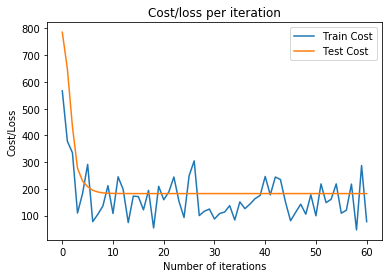

In [386]:
# Run our model
learning_rate = 0.01
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate,500)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))


error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error:",error)


plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

In [264]:
# print(y_train[0:10])

In [265]:
# manual_train.head(3)

In [266]:
# converting to numpy array, which will be available for both SGDRegressor of sklearn and manual sgd regressor
# train_data=np.array(manual_train)
# test_data=np.array(X_test)
# test_y=np.array(Y_test)

In [267]:
# print(test_data.shape)

In [268]:
# def cost_function(b, m, features, target):
#     totalError = 0
#     for i in range(0, len(features)):
#         x = features
#         y = target
#         totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
#     return totalError / len(x)

In [269]:
# def gradient_decent(w0, b0, X, x_test, y_test, learning_rate):
#     n_iter = 1000
#     partial_deriv_m = 0
#     partial_deriv_b = 0
#     cost_train = []
#     cost_test = []
#     for j in range(1, n_iter):
        
#         x_data = X.sample(160)
#         print(x_data.shape)
#         y=np.array(x_data['price'])
#         x=np.array(x_data.drop('price',axis=1))
#         print("a")
# #         Test sample
# #         x_test["PRICE"] = [y_test]
# #         test_data = x_test
# #         test_sample = test_data.sample()
# #         y_test = np.asmatrix(test_sample["PRICE"])
# #         x_test = np.asmatrix(test_sample.drop("PRICE", axis = 1))
        
#         for i in range(len(x)):
#             partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
#             partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
#         w1 = w0 - learning_rate * partial_deriv_m 
#         b1 = b0 - learning_rate * partial_deriv_b
        
#         if (w0==w1).all():
#             #print("W0 are\n", w0)
#             #print("\nW1 are\n", w1)
#             #print("\n X are\n", x)
#             #print("\n y are\n", y)
#             break
#         else:
#             w0 = w1
#             b0 = b1
#             learning_rate = learning_rate/2
       
            
#         error_train = cost_function(b0, w0, x, y)
#         cost_train.append(error_train)
# #         error_test = cost_function(b0, w0, test_data, test_y)
# #         cost_test.append(error_test)
        
#         #print("After {0} iteration error = {1}".format(j, error_train))
#         #print("After {0} iteration error = {1}".format(j, error_test))
        
#     return w0, b0, cost_train, cost_test

In [270]:
# # Run our model
# learning_rate = 0.001
# w0_random = np.random.rand(13)
# w0 = np.asmatrix(w0_random).T
# b0 = np.random.rand()

# optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, manual_train, test_data, test_y, learning_rate)

# print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

In [271]:
# print(X_train[0:5])
# # print(X_train.shape[0])
# train_sample = X_train[np.random.randint(X_train.shape[0],size=339), :]
# # y = np.asmatrix(train_sample["PRICE"])
# print(train_sample.shape)

# # A[np.random.randint(A.shape[0], size=2), :]

In [272]:
# #Logic to calculate weights and intercept referred from  https://github.com/anshuak100/Implement-SGD-to-Linear-Regression-on-Boston-house-prices-dataset/blob/master/sgd_imp_final.ipynb
# # #selecting various parameters for running manual sgd
# # #rate at which learning rate will decrease
# # red_t=0.25
# # learning_rate=0.01

# # # print(weight_new)
# # b_new=0
# # n=1
# def manual_sgd(X,learning_rate=0.01, red_t=0.25, no_of_iterations=100):
    
#     n=1
#     b_new=0
#     #creating a new array of shape 13 to hold final weights of all weight vectors
#     weight_new=np.zeros(shape=(1,13))
#     r=learning_rate
#     while(n<=no_of_iterations):
#         weight_old=weight_new
#         b_old=b_new
#         weight_temp=np.zeros(shape=(1,13))
#         b_temp=0
#         X_data=X.sample(10)
#         x=np.array(X_data.drop('price',axis=1))
#         y=np.array(X_data['price'])

#         #Here we are implementing sgd with batch size of 10
#         for i in range(10):
#             y_current=np.dot(weight_old,x[i])+b_old
#             weight_temp+=x[i] * (y[i] - y_current)
#             b_temp+=(y[i]-y_current)

#         weight_temp*=(-2/x.shape[0])
#         b_temp*=(-2/x.shape[0])

#         weight_new=(weight_old-r*weight_temp)
#         b_new=(b_old-r*b_temp)
# #       print(weight_new)

#         r = learning_rate / pow(n, red_t)
#         n+=1
    

#     return weight_new,b_new


In [273]:
# def pred(x,w, b):
#     y_pred=[]
#     for i in range(len(x)):
#         y=np.asscalar(np.dot(w,x[i])+b)
#         y_pred.append(y)
#     return np.array(y_pred)

In [274]:
# weight, b=manual_sgd(X=X_train , no_of_iterations=1)

In [275]:
# y_pred=pred(test_data, w=weight, b=b)
# # print(y_pred)

In [276]:
# manual_error=mean_squared_error(test_y,y_pred)
# print('error=',manual_error)

In [277]:
# plt.scatter(test_y, y_pred)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
# plt.show()


In [278]:
# manual_sgd_weights=weight
# print(manual_sgd_weights)

In [279]:
# weight, b=manual_sgd(X=manual_train , no_of_iterations=100)

In [280]:
# y_pred=pred(test_data, w=weight, b=b)

In [281]:
# manual_error=mean_squared_error(test_y,y_pred)
# print('error=',manual_error)

In [282]:
# plt.scatter(test_y, y_pred)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
# plt.show()

In [283]:
# weight, b=manual_sgd(X=manual_train , no_of_iterations=1000)

In [284]:
# y_pred=pred(test_data, w=weight, b=b)

In [285]:
# manual_error=mean_squared_error(test_y,y_pred)
# print('error=',manual_error)

In [286]:
# plt.scatter(test_y, y_pred)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
# plt.show()

In [287]:
# weight, b=manual_sgd(X=manual_train , no_of_iterations=10000)

In [288]:
# y_pred=pred(test_data, w=weight, b=b)

In [289]:
# manual_error=mean_squared_error(test_y,y_pred)
# print('error=',manual_error)

In [290]:
# manual_sgd_weights_10000=weight[0]
# # print(manual_sgd_weights_10000.ndim)
# print(manual_sgd_weights_10000)

In [291]:
# plt.scatter(test_y, y_pred)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
# plt.show()

## SGD Regressor

In [292]:
# clf = SGDRegressor()
# clf.fit(train_data, train_y)
# print(mean_squared_error(train_y, clf.predict(train_data)))

In [293]:
# # Weights of Sklearn's SGD
# sklearn_sgd_weights = clf.coef_ 
# print(sklearn_sgd_weights)
# a=clf.n_iter_
# print(a)

In [294]:
# sklearn_sgd_predictions = clf.predict(train_data)

# # Weights of Sklearn's SGD
# sklearn_sgd_weights = clf.coef_ 

# plt.scatter(train_y, sklearn_sgd_predictions)
# plt.xlabel("Actual Prices: $Y_i$",size=14)
# plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
# plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
# plt.show()

## Conclusion

In [295]:
# # Creating the table using PrettyTable library
# from prettytable import PrettyTable

# # Initializing prettytable
# x = PrettyTable()

# # Adding columns
# x.field_names = ["Algorithm", "Learning rate", "No of iterations","red_t", "Mean squared Error"]
# x.add_row(["Manual SGD", "0.01", 1,0.25, 571])
# x.add_row(["Manual SGD", "0.01", 100,0.25, 131])
# x.add_row(["Manual SGD", "0.01", 1000,0.25, 29.5])
# x.add_row(["Manual SGD", "0.01", 10000,0.25, 28.5])
# x.add_row(["SGDRegressor", "0.01", 5,0.25, 21])


# # Printing the Table
# print(x)

## Printing the Respective weights at optimal No_of_iterations

In [296]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",list(manual_sgd_weights_10000))
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

NameError: name 'manual_sgd_weights_10000' is not defined